Esté um notebook Colab contendo exercícios de programação em python, numpy e pytorch.

## Coloque seu nome

In [ ]:
print('Meu nome é: Matheus Lindino')

Meu nome é: Matheus Lindino


# Parte 1:

##Exercícios de Processamento de Dados

Nesta parte pode-se usar as bibliotecas nativas do python como a `collections`, `re` e `random`. Também pode-se usar o NumPy.

##Exercício 1.1
Crie um dicionário com os `k` itens mais frequentes de uma lista.

Por exemplo, dada a lista de itens `L=['a', 'a', 'd', 'b', 'd', 'c', 'e', 'a', 'b', 'e', 'e', 'a']` e `k=2`, o resultado deve ser um dicionário cuja chave é o item e o valor é a sua frequência: {'a': 4, 'e': 3}

In [ ]:
import collections

def top_k(L, k):
  frequency = collections.Counter(L)
  sort_orders = sorted(frequency.items(), key=lambda x: x[1], reverse=True)
  return dict(sort_orders[0:k])

Mostre que sua implementação está correta usando uma entrada com poucos itens:

In [ ]:
L = ['f', 'a', 'a', 'd', 'b', 'd', 'c', 'e', 'a', 'b', 'e', 'e', 'a', 'd']
k = 3
resultado = top_k(L=L, k=k)
print(f'resultado: {resultado}')

resultado: {'a': 4, 'd': 3, 'e': 3}


Mostre que sua implementação é eficiente usando uma entrada com 10M de itens:

In [ ]:
import random
L = random.choices('abcdefghijklmnopqrstuvwxyz', k=10_000_000)
k = 10000

In [ ]:
%%timeit
resultado = top_k(L=L, k=k)

476 ms ± 49.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Exercício 1.2

Em processamento de linguagem natural, é comum convertemos as palavras de um texto para uma lista de identificadores dessas palavras. Dado o dicionário `V` abaixo onde as chaves são palavras e os valores são seus respectivos identificadores, converta o texto `D` para uma lista de identificadores.

Palavras que não existem no dicionário deverão ser convertidas para o identificador do token `unknown`.

O código deve ser insensível a maiúsculas (case-insensitive).

Se atente que pontuações (vírgulas, ponto final, etc) também são consideradas palavras.

In [ ]:
def tokens_to_ids(text, vocabulary):
  strings = D.lower().replace('.', ' .').split(' ')
  result = []
  for i in strings:
    try:
      result.append(V[i])
    except:
      result.append(V['unknown'])
  return result

Mostre que sua implementação esta correta com um exemplo pequeno:

---



In [ ]:
V = {'eu': 1, 'de': 2, 'gosto': 3, 'comer': 4, '.': 5, 'unknown': -1}
D = 'Eu gosto de comer pizza.'

print(tokens_to_ids(D, V))

[1, 3, 2, 4, -1, 5]


Mostre que sua implementação é eficiente com um exemplo grande:

In [ ]:
V = {'eu': 1, 'de': 2, 'gosto': 3, 'comer': 4, '.': 5, 'unknown': -1}
D = ' '.join(1_000_000 * ['Eu gosto de comer pizza.'])

In [ ]:
%%timeit
resultado = tokens_to_ids(D, V)

2.37 s ± 882 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Exercício 1.3

Em aprendizado profundo é comum termos que lidar com arquivos muito grandes.

Dado um arquivo de texto onde cada item é separado por `\n`, escreva um programa que amostre `k` itens desse arquivo aleatoriamente.

Nota 1: Assuma amostragem de uma distribuição uniforme, ou seja, todos os itens tem a mesma probablidade de amostragem.

Nota 2: Assuma que o arquivo não cabe em memória.

Nota 3: Utilize apenas bibliotecas nativas do python.

In [ ]:
import time

def get_total_lines(fp):
  count = 0
  for i in fp:
    count += 1
  fp.seek(1)
  return count

def binary_search(A, item):
    left, right = 0, len(A) - 1
    while left <= right:
        half = (left + right) // 2
        if A[half] == item:
            return half
        elif A[half] > item:
            right = half - 1
        else:
            left = half + 1
    return -1

def sample(path: str, k: int):
  fp = open(path, 'r')
  lines = []
  total = get_total_lines(fp)
  idx_lines = random.sample(range(total), k)
  idx_lines.sort()

  for index, line in enumerate(fp):
    if binary_search(idx_lines, index) != -1:
        lines.append(line.strip())
        idx_lines.remove(index)

  fp.close()
  return lines

Mostre que sua implementação está correta com um exemplo pequeno:

In [ ]:
filename = 'small.txt'
total_size = 100
n_samples = 10

with open(filename, 'w') as fout:
    fout.write('\n'.join(f'line {i}' for i in range(total_size)))

samples = sample(path=filename, k=n_samples)
print(samples)
print(len(samples) == n_samples)

['line 10', 'line 14', 'line 17', 'line 32', 'line 52', 'line 66', 'line 80', 'line 86', 'line 89', 'line 90']
True


Mostre que sua implementação é eficiente com um exemplo grande:

In [ ]:
filename = 'large.txt'
total_size = 1_000_000
n_samples = 10000

with open(filename, 'w') as fout:
    fout.write('\n'.join(f'line {i}' for i in range(total_size)))

In [ ]:
%%timeit
samples = sample(path=filename, k=n_samples)
assert len(samples) == n_samples

2.79 s ± 19.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Parte 2:

##Exercícios de Numpy

Nesta parte deve-se usar apenas a biblioteca NumPy. Aqui não se pode usar o PyTorch.

##Exercício 2.1

Quantos operações de ponto flutuante (flops) de soma e de multiplicação tem a multiplicação matricial $AB$, sendo que a matriz $A$ tem tamanho $m \times n$ e a matriz $B$ tem tamanho $n \times p$?:

**Resposta:**

Para calcular o produto escalar, requer $n$ multiplicações e $n-1$ somas. Portanto:

- número de somas: $m \times (n-1) \times p$ 
- número de multiplicações: $m \times n \times p$

## Exercício 2.2

Em programação matricial, não se faz o loop em cada elemento da matriz,
mas sim, utiliza-se operações matriciais.

Dada a matriz `A` abaixo, calcule a média dos valores de cada linha sem utilizar laços explícitos.

Utilize apenas a biblioteca numpy.

In [ ]:
import numpy as np

In [ ]:
A = np.arange(24).reshape(4, 6)
print(A)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]


In [ ]:
A.mean(axis=1)

array([ 2.5,  8.5, 14.5, 20.5])

## Exercício 2.3

Seja a matriz $C$ que é a normalização da matriz $A$:
$$ C(i,j) = \frac{A(i,j) - A_{min}}{A_{max} - A_{min}} $$

Normalizar a matriz `A` do exercício acima de forma que seus valores fiquem entre 0 e 1.

In [ ]:
C = (A - A.min()) / (A.max() - A.min())
print(C)

[[0.         0.04347826 0.08695652 0.13043478 0.17391304 0.2173913 ]
 [0.26086957 0.30434783 0.34782609 0.39130435 0.43478261 0.47826087]
 [0.52173913 0.56521739 0.60869565 0.65217391 0.69565217 0.73913043]
 [0.7826087  0.82608696 0.86956522 0.91304348 0.95652174 1.        ]]


## Exercício 2.4

Modificar o exercício anterior de forma que os valores de cada *coluna* da matriz `A` sejam normalizados entre 0 e 1 independentemente dos valores das outras colunas.


In [ ]:
C = (A - A.min(axis=0)) / (A.max(axis=0) - A.min(axis=0))
print(C)

[[0.         0.         0.         0.         0.         0.        ]
 [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]
 [0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667]
 [1.         1.         1.         1.         1.         1.        ]]


## Exercício 2.5

Modificar o exercício anterior de forma que os valores de cada *linha* da matriz `A` sejam normalizados entre 0 e 1 independentemente dos valores das outras linhas.


In [ ]:
A = A.T
C = ((A - A.min(axis=0)) / (A.max(axis=0) - A.min(axis=0))).T
print(C)

[[0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]]


## Exercício 2.6

A [função softmax](https://en.wikipedia.org/wiki/Softmax_function) é bastante usada em apredizado de máquina para converter uma lista de números para uma distribuição de probabilidade, isto é, os números ficarão normalizados entre zero e um e sua soma será igual à um.

Implemente a função softmax com suporte para batches, ou seja, o softmax deve ser aplicado a cada linha da matriz. Deve-se usar apenas a biblioteca numpy. Se atente que a exponenciação gera estouro de representação quando os números da entrada são muito grandes. Tente corrigir isto.

In [ ]:
import numpy as np


def softmax(A):
  '''
  Aplica a função de softmax à matriz `A`.

  Entrada:
    `A` é uma matriz M x N, onde M é o número de exemplos a serem processados
    independentemente e N é o tamanho de cada exemplo.
  
  Saída:
    Uma matriz M x N, onde a soma de cada linha é igual a um.
  '''
  T = A.T
  exp = np.exp((T - T.max(axis=0)))
  return (exp / exp.sum(axis=0)).T

Mostre que sua implementação está correta usando uma matriz pequena como entrada:

In [ ]:
A = np.array([[0.5, -1, 1000],
              [-2,   0, 0.5]])
softmax(A)

array([[0.        , 0.        , 1.        ],
       [0.04861082, 0.35918811, 0.59220107]])

O código a seguir verifica se sua implementação do softmax está correta. 
- A soma de cada linha de A deve ser 1;
- Os valores devem estar entre 0 e 1

In [ ]:
np.allclose(softmax(A).sum(axis=1), 1) and softmax(A).min() >= 0 and softmax(A).max() <= 1

True

Mostre que sua implementação é eficiente usando uma matriz grande como entrada:

In [ ]:
A = np.random.uniform(low=-10, high=10, size=(128, 100_000))

In [ ]:
%%timeit
softmax(A)

253 ms ± 4.34 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
SM = softmax(A)
np.allclose(SM.sum(axis=1), 1) and SM.min() >= 0 and SM.max() <= 1

True

## Exercício 2.7

A codificação one-hot é usada para codificar entradas categóricas. É uma codificação onde apenas um bit é 1 e os demais são zero, conforme a tabela a seguir.

| Decimal | Binary | One-hot
| ------- | ------ | -------
| 0 | 000    | 1 0 0 0 0 0 0 0
| 1 | 001    | 0 1 0 0 0 0 0 0
| 2 | 010    | 0 0 1 0 0 0 0 0
| 3 | 011    | 0 0 0 1 0 0 0 0
| 4 | 100    | 0 0 0 0 1 0 0 0
| 5 | 101    | 0 0 0 0 0 1 0 0
| 6 | 110    | 0 0 0 0 0 0 1 0
| 7 | 111    | 0 0 0 0 0 0 0 1

Implemente a função one_hot(y, n_classes) que codifique o vetor de inteiros y que possuem valores entre 0 e n_classes-1.


In [ ]:
def one_hot(y, n_classes):
  one_hot_vector = np.zeros((len(y), n_classes))
  one_hot_vector[[i for i in range(len(y))], y] = 1
  return one_hot_vector

In [ ]:
N_CLASSES = 9
N_SAMPLES = 10
y = (np.random.rand((N_SAMPLES)) * N_CLASSES).astype(int)
print(y)
print(one_hot(y, N_CLASSES))

[6 6 3 0 4 0 5 5 6 4]
[[0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]]


Mostre que sua implementação é eficiente usando uma matriz grande como entrada:

In [ ]:
N_SAMPLES = 100_000
N_CLASSES = 1_000
y = (np.random.rand((N_SAMPLES)) * N_CLASSES).astype(int)

In [ ]:
%%timeit
one_hot(y, N_CLASSES)

193 ms ± 1.71 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Exercício 2.8

Implemente uma classe que normalize um array de pontos flutuantes `array_a` para a mesma média e desvio padrão de um outro array `array_b`, conforme exemplo abaixo:
```
array_a = np.array([-1, 1.5, 0])
array_b = np.array([1.4, 0.8, 0.3, 2.5])
normalize = Normalizer(array_b)
normalized_array = normalize(array_a)
print(normalized_array)  # Deve imprimir [0.3187798  2.31425165 1.11696854]
```

In [ ]:
# Escreva seu código aqui.
import numpy as np

class Normalizer:
  def __init__(self, array):
    self.mean = np.mean(array)
    self.std  = np.std(array)

  def __call__(self, array):
    z_score = (array - np.mean(array)) / np.std(array)    
    return z_score * self.std + self.mean 

Mostre que seu código está correto com o exemplo abaixo:

In [ ]:
array_a = [-1, 1.5, 0]
array_b = [1.4, 0.8, 0.3, 2.5]
normalize = Normalizer(array_b)
normalized_array = normalize(array_a)
print(normalized_array)

[0.3187798  2.31425165 1.11696854]


# Parte 3:

##Exercícios Pytorch: Grafo Computacional e Gradientes

Nesta parte pode-se usar quaisquer bibliotecas.

Um dos principais fundamentos para que o PyTorch seja adequado para deep learning é a sua habilidade de calcular o gradiente automaticamente a partir da expressões definidas. Essa facilidade é implementada através do cálculo automático do gradiente e construção dinâmica do grafo computacional.

## Grafo computacional

Seja um exemplo simples de uma função de perda J dada pela Soma dos Erros ao Quadrado (SEQ - Sum of Squared Errors): 
$$ J = \sum_i (x_i w - y_i)^2 $$
que pode ser reescrita como:
$$ \hat{y_i} = x_i w $$
$$ e_i = \hat{y_i} - y_i $$
$$ e2_i = e_i^2 $$
$$ J = \sum_i e2_i $$

As redes neurais são treinadas através da minimização de uma função de perda usando o método do gradiente descendente. Para ajustar o parâmetro $w$ precisamos calcular o gradiente $  \frac{ \partial J}{\partial w} $. Usando a
regra da cadeia podemos escrever:
$$ \frac{ \partial J}{\partial w} = \frac{ \partial J}{\partial e2_i} \frac{ \partial e2_i}{\partial e_i} \frac{ \partial e_i}{\partial \hat{y_i} } \frac{ \partial \hat{y_i}}{\partial w}$$ 

```
    y_pred = x * w
    e = y_pred - y
    e2 = e**2
    J = e2.sum()
```

As quatro expressões acima, para o cálculo do J podem ser representadas pelo grafo computacional visualizado a seguir: os círculos são as variáveis (tensores), os quadrados são as operações, os números em preto são os cálculos durante a execução das quatro expressões para calcular o J (forward, predict). O cálculo do gradiente, mostrado em vermelho, é calculado pela regra da cadeia, de trás para frente (backward).

<img src="https://raw.githubusercontent.com/robertoalotufo/files/master/figures/GrafoComputacional.png" width="600pt"/>

Para entender melhor o funcionamento do grafo computacional com os tensores, recomenda-se leitura em:

https://pytorch.org/docs/stable/notes/autograd.html

In [ ]:
import torch

In [ ]:
torch.__version__

'1.12.1+cu113'

**Tensor com atributo .requires_grad=True**

Quando um tensor possui o atributo `requires_grad` como verdadeiro, qualquer expressão que utilizar esse tensor irá construir um grafo computacional para permitir posteriormente, após calcular a função a ser derivada, poder usar a regra da cadeia e calcular o gradiente da função em termos dos tensores que possuem o atributo `requires_grad`.


In [ ]:
y = torch.arange(0, 8, 2).float()
y

tensor([0., 2., 4., 6.])

In [ ]:
x = torch.arange(0, 4).float()
x

tensor([0., 1., 2., 3.])

In [ ]:
w = torch.ones(1, requires_grad=True)
w

tensor([1.], requires_grad=True)

## Cálculo automático do gradiente da função perda J

Seja a expressão: $$ J = \sum_i ((x_i  w) - y_i)^2 $$

Queremos calcular a derivada de $J$ em relação a $w$.

## Forward pass

Durante a execução da expressão, o grafo computacional é criado. Compare os valores de cada parcela calculada com os valores em preto da figura ilustrativa do grafo computacional.

In [ ]:
# predict (forward)
y_pred = x * w; print('y_pred =', y_pred)

# cálculo da perda J: loss
e = y_pred - y; print('e =',e)
e2 = e.pow(2) ; print('e2 =', e2)
J = e2.sum()  ; print('J =', J)

y_pred = tensor([0., 1., 2., 3.], grad_fn=<MulBackward0>)
e = tensor([ 0., -1., -2., -3.], grad_fn=<SubBackward0>)
e2 = tensor([0., 1., 4., 9.], grad_fn=<PowBackward0>)
J = tensor(14., grad_fn=<SumBackward0>)


## Backward pass

O `backward()` varre o grafo computacional a partir da variável a ele associada (raiz) e calcula o gradiente para todos os tensores que possuem o atributo `requires_grad` como verdadeiro.
Observe que os tensores que tiverem o atributo `requires_grad` serão sempre folhas no grafo computacional.
O `backward()` destroi o grafo após sua execução. Esse comportamento é padrão no PyTorch. 

A título ilustrativo, se quisermos depurar os gradientes dos nós que não são folhas no grafo computacional, precisamos primeiro invocar `retain_grad()` em cada um desses nós, como a seguir. Entretanto nos exemplos reais não há necessidade de verificar o gradiente desses nós.

In [ ]:
e2.retain_grad()
e.retain_grad()
y_pred.retain_grad()

E agora calculamos os gradientes com o `backward()`.

w.grad é o gradiente de J em relação a w.

In [ ]:
if w.grad: w.grad.zero_()
J.backward()
print(w.grad)

tensor([-28.])


Mostramos agora os gradientes que estão grafados em vermelho no grafo computacional:

In [ ]:
print(e2.grad)
print(e.grad)
print(y_pred.grad)

tensor([1., 1., 1., 1.])
tensor([ 0., -2., -4., -6.])
tensor([ 0., -2., -4., -6.])


##Exercício 3.1
Calcule o mesmo gradiente ilustrado no exemplo anterior usando a regra das diferenças finitas, de acordo com a equação a seguir, utilizando um valor de $\Delta w$ bem pequeno.

$$ \frac{\partial J}{\partial w} = \frac{J(w + \Delta w) - J(w - \Delta w)}{2 \Delta w} $$

In [ ]:
def J_func(w, x, y):
    # programe a função J_func, para facilitar
    return sum((x*w - y)**2)

# Calcule o gradiente usando a regra diferenças finitas
# Confira com o valor já calculado anteriormente
x = torch.arange(0, 4).float()
y = torch.arange(0, 8, 2).float()
w = torch.ones(1)
delta_w = 1e-2
grad = (J_func(w+delta_w, x, y) - J_func(w-delta_w, x, y)) / (2*delta_w)
print('grad=', grad)

grad= tensor(-28.0000)


##Exercício 3.2

Minimizando $J$ pelo gradiente descendente

$$ w_{k+1} = w_k - \lambda \frac {\partial J}{\partial w} $$

Supondo que valor inicial ($k=0$) $w_0 = 1$, use learning rate $\lambda = 0.01$ para calcular o valor do novo $w_{20}$, ou seja, fazendo 20 atualizações de gradientes. Deve-se usar a função `J_func` criada no exercício anterior.

Confira se o valor do primeiro gradiente está de acordo com os valores já calculado acima

In [ ]:
import matplotlib.pyplot as plt

learning_rate = 0.01
iteracoes = 20

x = torch.arange(0, 4).float()
y = torch.arange(0, 8, 2).float()
w = torch.ones(1)

history_J = []
history_i = []

for i in range(iteracoes):
    print('i =', i)
    J = J_func(w, x, y)
    print('J=', J)
    grad = (J_func(w + delta_w, x, y) - J_func(w - delta_w, x, y)) / (2 * delta_w)
    print('grad =',grad)
    w = w - learning_rate * grad
    print('w =', w)

    history_J.append(J)
    history_i.append(i)

i = 0
J= tensor(14.)
grad = tensor(-28.0000)
w = tensor([1.2800])
i = 1
J= tensor(7.2576)
grad = tensor(-20.1600)
w = tensor([1.4816])
i = 2
J= tensor(3.7623)
grad = tensor(-14.5151)
w = tensor([1.6268])
i = 3
J= tensor(1.9504)
grad = tensor(-10.4509)
w = tensor([1.7313])
i = 4
J= tensor(1.0111)
grad = tensor(-7.5247)
w = tensor([1.8065])
i = 5
J= tensor(0.5242)
grad = tensor(-5.4178)
w = tensor([1.8607])
i = 6
J= tensor(0.2717)
grad = tensor(-3.9008)
w = tensor([1.8997])
i = 7
J= tensor(0.1409)
grad = tensor(-2.8086)
w = tensor([1.9278])
i = 8
J= tensor(0.0730)
grad = tensor(-2.0222)
w = tensor([1.9480])
i = 9
J= tensor(0.0379)
grad = tensor(-1.4560)
w = tensor([1.9626])
i = 10
J= tensor(0.0196)
grad = tensor(-1.0483)
w = tensor([1.9730])
i = 11
J= tensor(0.0102)
grad = tensor(-0.7548)
w = tensor([1.9806])
i = 12
J= tensor(0.0053)
grad = tensor(-0.5434)
w = tensor([1.9860])
i = 13
J= tensor(0.0027)
grad = tensor(-0.3913)
w = tensor([1.9899])
i = 14
J= tensor(0.0014)
grad = tensor(-0.2

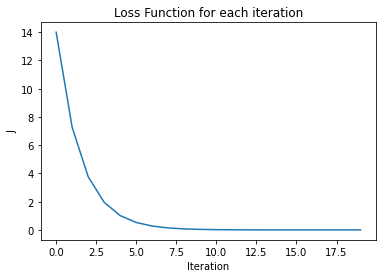

In [ ]:
# Plote o gráfico da loss J pela iteração i
plt.plot(history_i, history_J)
plt.xlabel('Iteration')
plt.ylabel('J')
plt.title('Loss Function for each iteration')
plt.show()

##Exercício 3.3

Repita o exercício 2 mas usando agora o calculando o gradiente usando o método backward() do pytorch. Confira se o primeiro valor do gradiente está de acordo com os valores anteriores. Execute essa próxima célula duas vezes. Os valores devem ser iguais.


In [ ]:
learning_rate = 0.01
iteracoes = 20

x = torch.arange(0, 4).float()
y = torch.arange(0, 8, 2).float()
w = torch.ones(1, requires_grad=True)

history_J = []
history_i = []

for i in range(iteracoes):
    print('i =', i)
    J = J_func(w, x, y)
    print('J=', J)
    print(w.grad)
    if w.grad: w.grad.zero_()
    J.backward()
    grad = w.grad
    print('grad =',grad)
    w = w - learning_rate * grad
    print('w =', w)
    w.retain_grad()

    history_J.append(J.item())
    history_i.append(i)

i = 0
J= tensor(14., grad_fn=<AddBackward0>)
None
grad = tensor([-28.])
w = tensor([1.2800], grad_fn=<SubBackward0>)
i = 1
J= tensor(7.2576, grad_fn=<AddBackward0>)
None
grad = tensor([-20.1600])
w = tensor([1.4816], grad_fn=<SubBackward0>)
i = 2
J= tensor(3.7623, grad_fn=<AddBackward0>)
None
grad = tensor([-14.5152])
w = tensor([1.6268], grad_fn=<SubBackward0>)
i = 3
J= tensor(1.9504, grad_fn=<AddBackward0>)
None
grad = tensor([-10.4509])
w = tensor([1.7313], grad_fn=<SubBackward0>)
i = 4
J= tensor(1.0111, grad_fn=<AddBackward0>)
None
grad = tensor([-7.5247])
w = tensor([1.8065], grad_fn=<SubBackward0>)
i = 5
J= tensor(0.5241, grad_fn=<AddBackward0>)
None
grad = tensor([-5.4178])
w = tensor([1.8607], grad_fn=<SubBackward0>)
i = 6
J= tensor(0.2717, grad_fn=<AddBackward0>)
None
grad = tensor([-3.9008])
w = tensor([1.8997], grad_fn=<SubBackward0>)
i = 7
J= tensor(0.1409, grad_fn=<AddBackward0>)
None
grad = tensor([-2.8086])
w = tensor([1.9278], grad_fn=<SubBackward0>)
i = 8
J= tensor(0.0

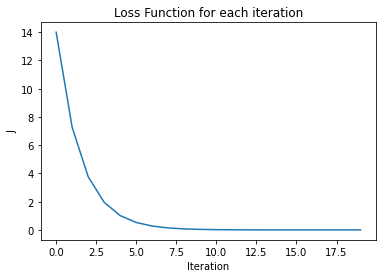

In [ ]:
# Plote o gráfico da loss J pela iteração i
plt.plot(history_i, history_J)
plt.xlabel('Iteration')
plt.ylabel('J')
plt.title('Loss Function for each iteration')
plt.show()

##Exercício 3.4

Quais são as restrições na escolha dos valores de $\Delta w$ no cálculo do gradiente por diferenças finitas?

**Resposta:**

O $\Delta w$ indica a distancia entre amostras para o cálculo da diferenças finitas. Essa distância deve ser pequena o suficiente para possuir um erro adequado no resultado da derivada, porêm grande o suficiente para não acontecer o cancelamento caststrófico (aumento substancial no erro relativo). Um exemplo desse fenêmeno pode ser visto abaixo:

In [ ]:
import matplotlib.pyplot as plt

J = J_func(w, x, y)
x = torch.arange(0, 4).float()
y = torch.arange(0, 8, 2).float()
w = torch.ones(1)

## Assumindo que o valor correto é -28
true_grad = -28
for delta_w in (1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8):
  grad = (J_func(w+delta_w, x, y) - J_func(w-delta_w, x, y)) / (2*delta_w)
  print(f'Erro para delta_w = {delta_w:.0e}: \t{true_grad - grad.item():.4e}')

Erro para delta_w = 1e-02: 	-2.6703e-05
Erro para delta_w = 1e-03: 	8.2970e-04
Erro para delta_w = 1e-04: 	-1.2207e-04
Erro para delta_w = 1e-05: 	3.8025e-02
Erro para delta_w = 1e-06: 	-3.4344e-01
Erro para delta_w = 1e-07: 	1.0147e+01
Erro para delta_w = 1e-08: 	-2.8000e+01


##Exercício 3.5

Até agora trabalhamos com $w$ contendo apenas um parâmetro. Suponha agora que $w$ seja uma matriz com $N$ parâmetros e que o custo para executar $(x_i w - y_i)^2$ seja $O(N)$.
> a) Qual é o custo computacional para fazer uma única atualização (um passo de gradiente) dos parâmetros de $w$ usando o método das diferencas finitas?
>
> b) Qual é o custo computacional para fazer uma única atualização (um passo de gradiente) dos parâmetros de $w$ usando o método do backpropagation?



Resposta (justifique):

a) $O(N²)$ -> A função $J$ é o somatório de  $(x_i w - y_i)^2$, portanto a computação é N vezes o tamanho da matriz de X e y, ou seja $O(N)$ (sabendo que X e y não dependem de N). Para calulcar o método das diferenas finitas, necessita realizar essa operação duas vezes: $2 \times O(N)$. Assintoticamente, é igual a $O(N)$.

b) $O(N)$ -> O backpropagation tem a mesma complexidade do foward, uma vez que os gradientes já foram calculados. Desta forma, a complexidade é de $O(N)$

##Exercício 3.6

Qual o custo (entropia cruzada) esperado para um exemplo (uma amostra) no começo do treinamento de um classificador inicializado aleatoriamente?

A equação da entropia cruzada é:
$$L = - \sum_{j=0}^{K-1} y_j \log p_j, $$
Onde:

- K é o número de classes;

- $y_j=1$ se $j$ é a classe do exemplo (ground-truth), 0 caso contrário. Ou seja, $y$ é um vetor one-hot;

- $p_j$ é a probabilidade predita pelo modelo para a classe $j$.

A resposta tem que ser em função de uma ou mais das seguintes variáveis:

- K = número de classes

- B = batch size

- D = dimensão de qualquer vetor do modelo

- LR = learning rate

**Resposta:**

Considerando que cada classe tem a mesma probabilidade, $p_j = \frac{1}{K}$, sendo $K$ o número de classes existentes. Portanto:

$$L = - \frac{1}{K} \sum_{j=0}^{K-1} y_j \log (p_j) $$
$$L = - \frac{1}{K} \sum_{j=0}^{K-1} y_j \log (\frac{1}{K}) $$
$$L = - \frac{1}{K} \sum_{j=0}^{K-1} y_j \log (1) - \log (K) $$
$$L = \frac{1}{K} \sum_{j=0}^{K-1} y_j \log (K) $$

$$L = log(K)$$


Fim do notebook.